In [3]:
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

In [7]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]

rsol

In [8]:
_.evalf()

In [9]:
Area_r.diff(r, 2).subs(r, rsol)

In [10]:
Area_r.subs(r, rsol)

In [11]:
_.evalf()

In [12]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [13]:
f(r_min)

In [14]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

In [15]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5 * (x2-1)**2 -2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

# Gradient
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [16]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

# Hessian
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [17]:
f_lambda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lambda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lambda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [18]:
def func_XY_to_X_Y(f):
    """
    Wrapper for f(x) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_to_X_Y(f_lambda)
fprime = func_XY_to_X_Y(fprime_lambda)
fhess = func_XY_to_X_Y(fhess_lambda)

x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


In [19]:
x_opt

array([1.88292613, 1.37658523])

In [21]:
x_ = y_ = np.linspace(-1, 4, 100)

In [22]:
x_

array([-1.        , -0.94949495, -0.8989899 , -0.84848485, -0.7979798 ,
       -0.74747475, -0.6969697 , -0.64646465, -0.5959596 , -0.54545455,
       -0.49494949, -0.44444444, -0.39393939, -0.34343434, -0.29292929,
       -0.24242424, -0.19191919, -0.14141414, -0.09090909, -0.04040404,
        0.01010101,  0.06060606,  0.11111111,  0.16161616,  0.21212121,
        0.26262626,  0.31313131,  0.36363636,  0.41414141,  0.46464646,
        0.51515152,  0.56565657,  0.61616162,  0.66666667,  0.71717172,
        0.76767677,  0.81818182,  0.86868687,  0.91919192,  0.96969697,
        1.02020202,  1.07070707,  1.12121212,  1.17171717,  1.22222222,
        1.27272727,  1.32323232,  1.37373737,  1.42424242,  1.47474747,
        1.52525253,  1.57575758,  1.62626263,  1.67676768,  1.72727273,
        1.77777778,  1.82828283,  1.87878788,  1.92929293,  1.97979798,
        2.03030303,  2.08080808,  2.13131313,  2.18181818,  2.23232323,
        2.28282828,  2.33333333,  2.38383838,  2.43434343,  2.48

In [24]:
X, Y = np.meshgrid(x_, y_)

array([[-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ],
       [-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ],
       [-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ],
       ...,
       [-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ],
       [-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ],
       [-1.        , -0.94949495, -0.8989899 , ...,  3.8989899 ,
         3.94949495,  4.        ]])

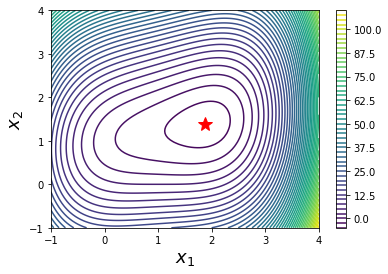

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
c = ax.contour(X, Y, f_lambda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [27]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [28]:
x_opt

array([1.88292645, 1.37658596])

In [29]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [30]:
x_opt

array([1.88292612, 1.37658523])

In [31]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


In [32]:
x_opt

array([1.88292644, 1.37658595])

In [38]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

array([1.5, 1.5])

In [39]:
f(x_start)

In [40]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [41]:
x_opt

array([1.47586906, 1.48365787])

In [42]:
f(x_opt)

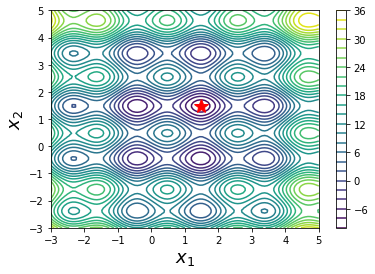

In [43]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel(),])).reshape(*s)

x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)

fig, ax = plt.subplots(figsize=(6,4))
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [44]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [46]:
result = optimize.minimize(f, x_start, method= 'BFGS')
x_opt = result.x
x_opt

array([1.47586906, 1.48365787])

In [47]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [48]:
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.24430272, 0.746102  , 0.46895276])

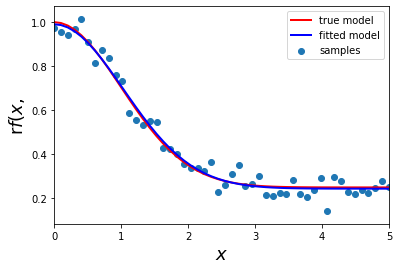

In [49]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel("r$f(x, \beta)$", fontsize=18)
ax.legend()

In [50]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24430272, 0.746102  , 0.46895276])

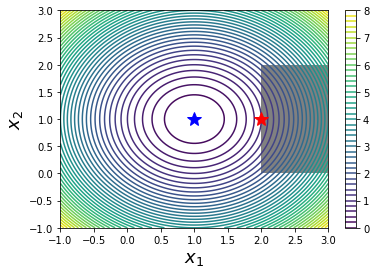

In [57]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, [1, 1], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                            bnd_x1[1] - bnd_x1[0], bnd_x2[1] -
                            bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [59]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")
f = x0 * x1 * x2
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1
L = f + l * g

grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

In [60]:
g.subs(sols[0])

In [61]:
f.subs(sols[0])

In [63]:
def f(X):
    return -X[0] * X[1] * X[2]
    
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

constraint = dict(type='eq', fun=g)
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=[constraint])
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

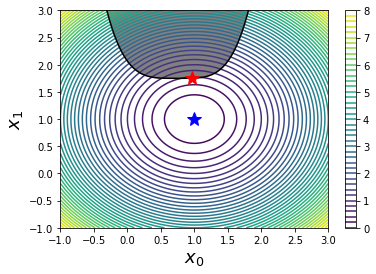

In [66]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4

constraints = [dict(type='ineq', fun=g)]

x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0,0), method='SLSQP', constraints=constraints).x

fig, ax = plt.subplots(figsize=(6,4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

In [68]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[ 1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [0.0, -1.0, 1.0]])
b = np.array([1.0, 2.0, 3.0])

A_ = cvxopt.matrix(A)
A_

<3x3 matrix, tc='d'>

In [69]:
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

sol = cvxopt.solvers.lp(c_, A_, b_)
sol

Optimal solution found.


{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 0.0,
 'dual infeasibility': 1.4835979218054372e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [70]:
x = np.array(sol['x'])
x

array([[0.25],
       [0.75],
       [3.75]])

In [72]:
sol['primal objective']